# Dataset Info - 
### **With the help of sepal length , sepal width ,petal length ,petal width features I have to find out whether flower Iris-Setosa Or Iris-Versicolour Or Iris-Virginica IS.**

## **this is a Binary Classification Problem**

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes.
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

# Logistic Regression

In [161]:
from sklearn.datasets import load_iris # for dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split # for train test split
from sklearn.linear_model import LogisticRegression # for algorithm
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report # for Confusion matrix , accuracy score , accuracy(classificatio report(Precision , Recall , F-Beta Score))
from sklearn.model_selection import GridSearchCV # for Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV # for Hyperparameter tuning

In [162]:
dataset= load_iris()

In [163]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [164]:
dataset.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [165]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [166]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [167]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [168]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [169]:
df = pd.DataFrame(data=dataset.data,columns=dataset.feature_names)

In [170]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [171]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

### Adding target feature

In [172]:
df['target'] = dataset.target

In [173]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### for binary classification 
I am gonna to remove those rows from all features who have 2 in target

In [174]:
mask = df['target'] != 2
binary_df = df[mask]

In [175]:
binary_df['target'].value_counts()

target
0    50
1    50
Name: count, dtype: int64

## EDA

### Insights
- my target feature is not imabalanced
- columns dtype is already fixed
- don't have any null values
- petal length and petal width are highly correlated
- sepal length and sepal width are normally distributed
- values are not spread so scaling is not important

In [176]:
binary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
 2   petal length (cm)  100 non-null    float64
 3   petal width (cm)   100 non-null    float64
 4   target             100 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 4.3 KB


In [177]:
binary_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [178]:
binary_df.nunique()

sepal length (cm)    28
sepal width (cm)     23
petal length (cm)    28
petal width (cm)     15
target                2
dtype: int64

In [179]:
binary_df['target'].value_counts(normalize=True)*100

target
0    50.0
1    50.0
Name: proportion, dtype: float64

In [180]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Visualizing the data

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

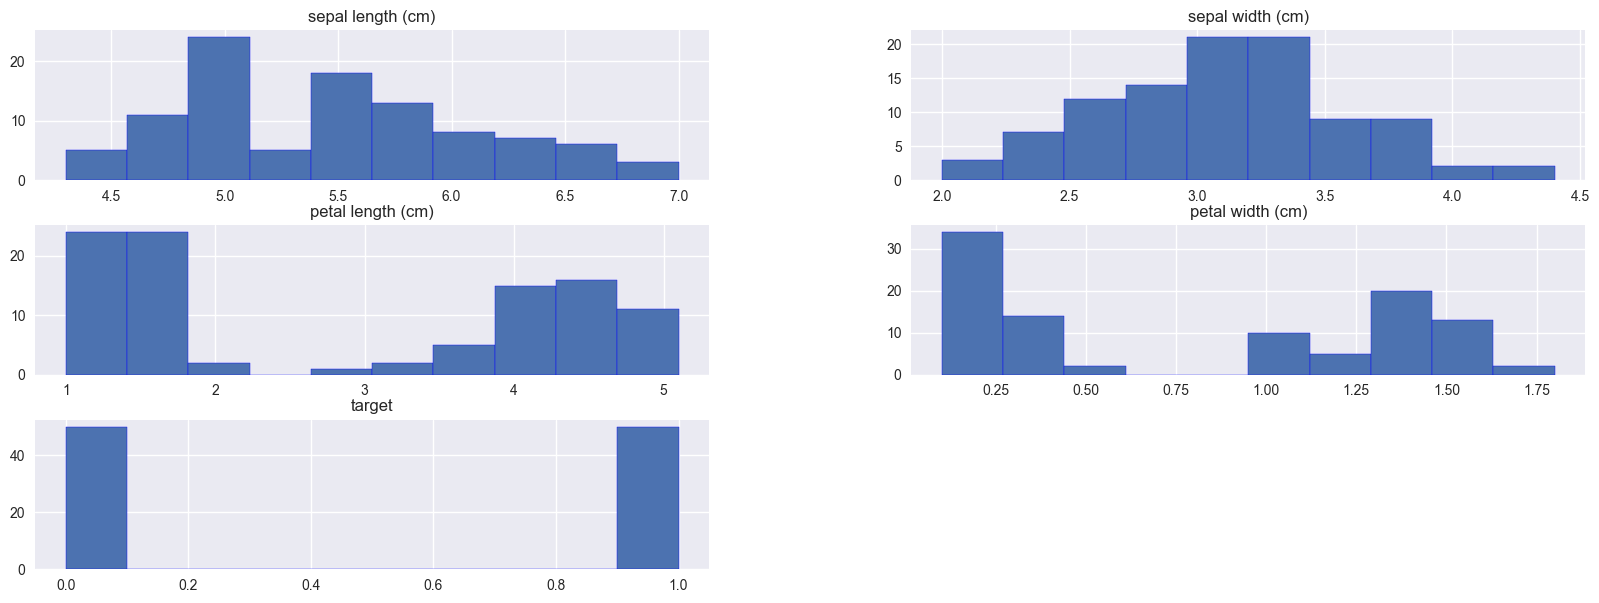

In [181]:
plt.style.use('seaborn')
binary_df.hist(figsize=(20,7),ec='b')

<Axes: xlabel='sepal width (cm)', ylabel='Count'>

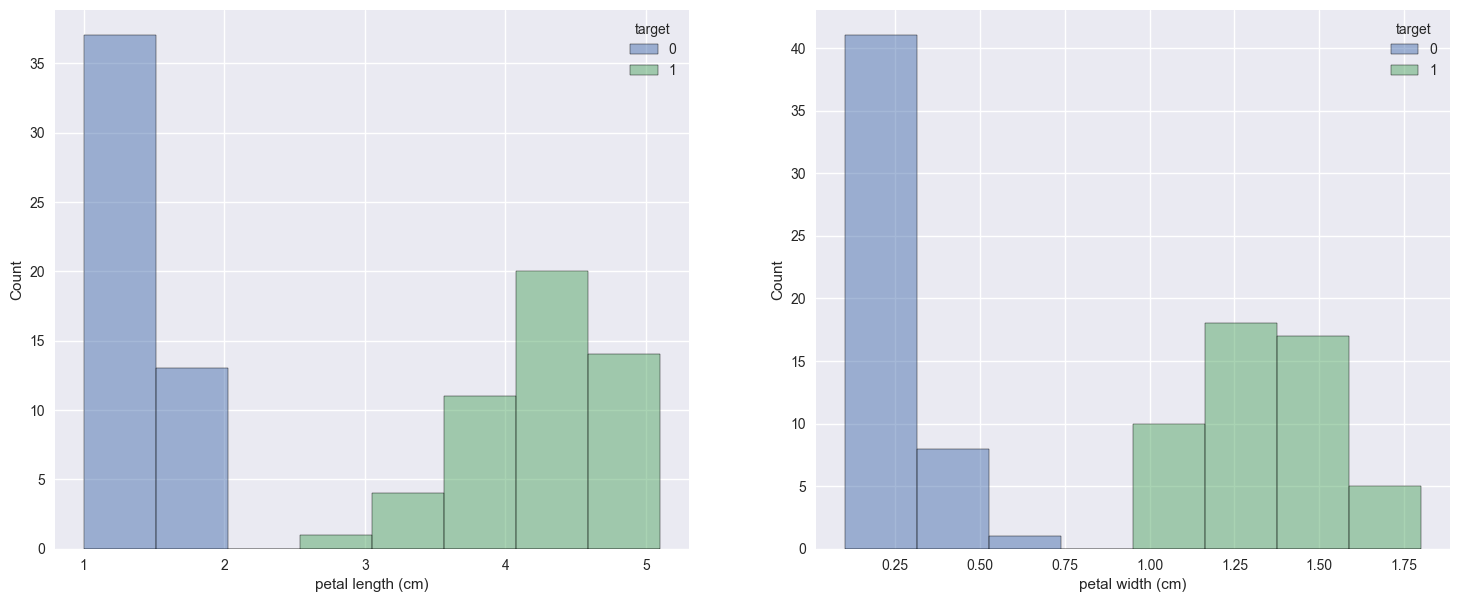

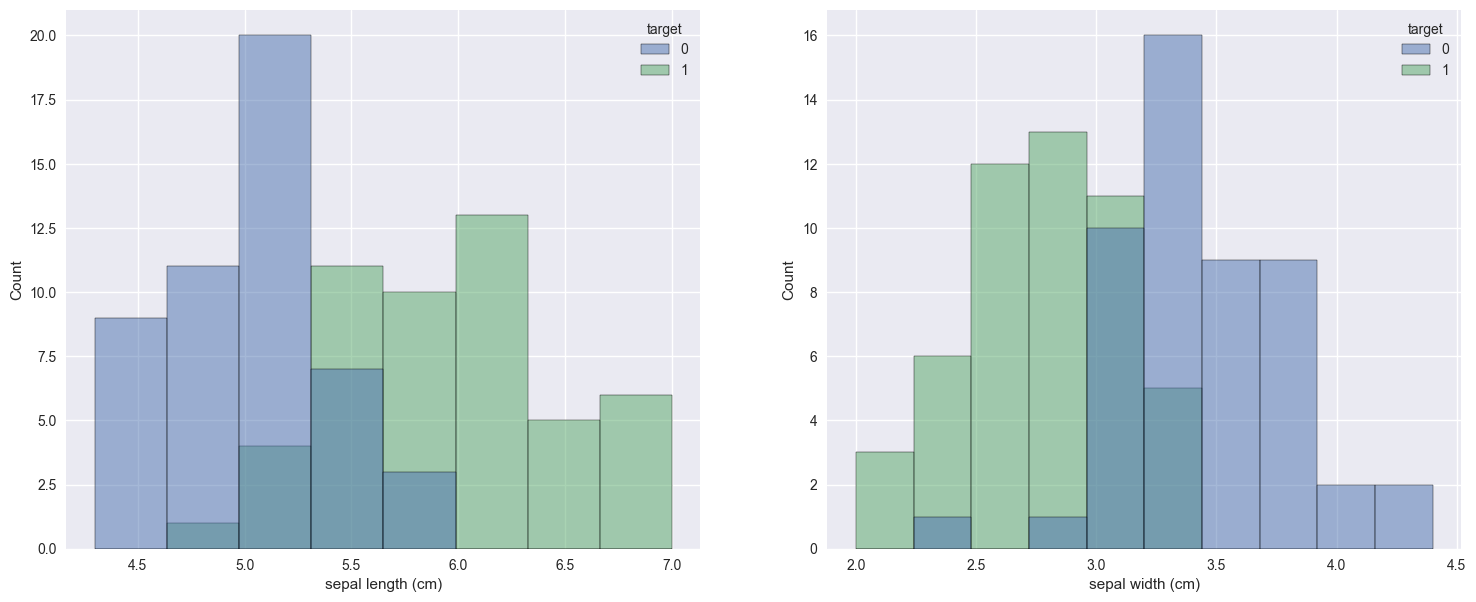

In [182]:
plt.subplots(1,2,figsize = (18,7))
plt.subplot(1,2,1)
sns.histplot(x=binary_df['petal length (cm)'],hue='target',data=binary_df)
plt.subplot(1,2,2)
sns.histplot(x=binary_df['petal width (cm)'],hue='target',data=binary_df)


plt.subplots(1,2,figsize = (18,7))
plt.subplot(1,2,1)
sns.histplot(x=binary_df['sepal length (cm)'],hue='target',data=binary_df)
plt.subplot(1,2,2)
sns.histplot(x=binary_df['sepal width (cm)'],hue='target',data=binary_df)


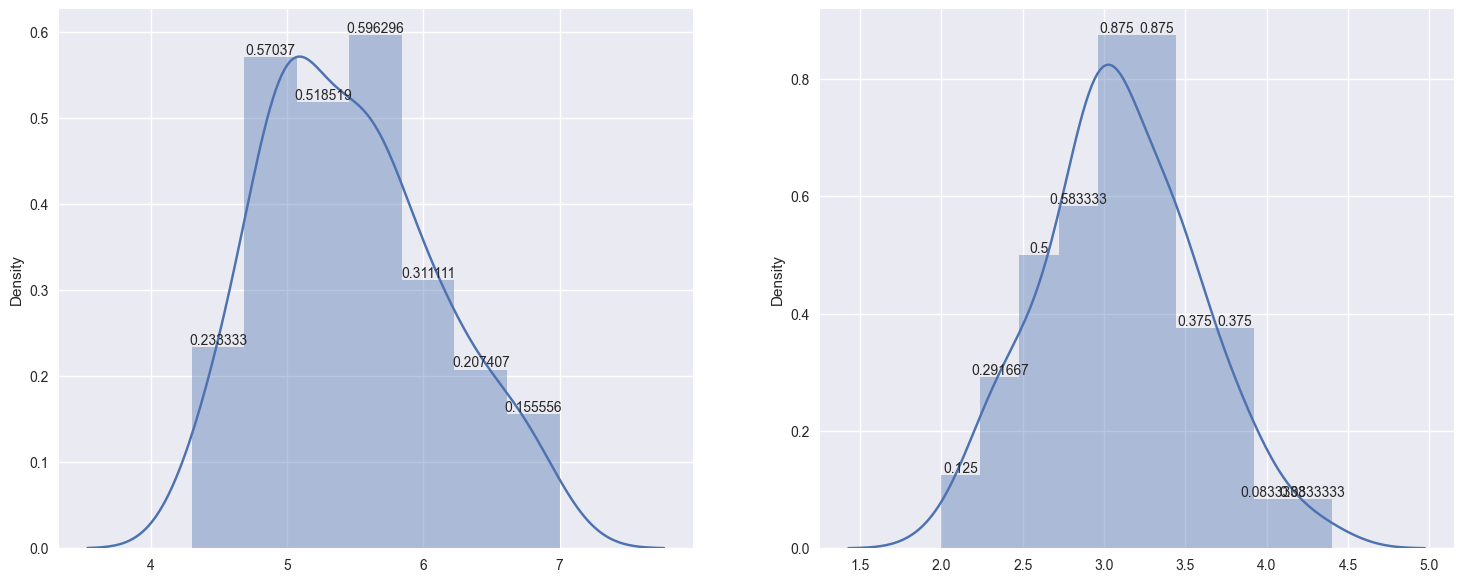

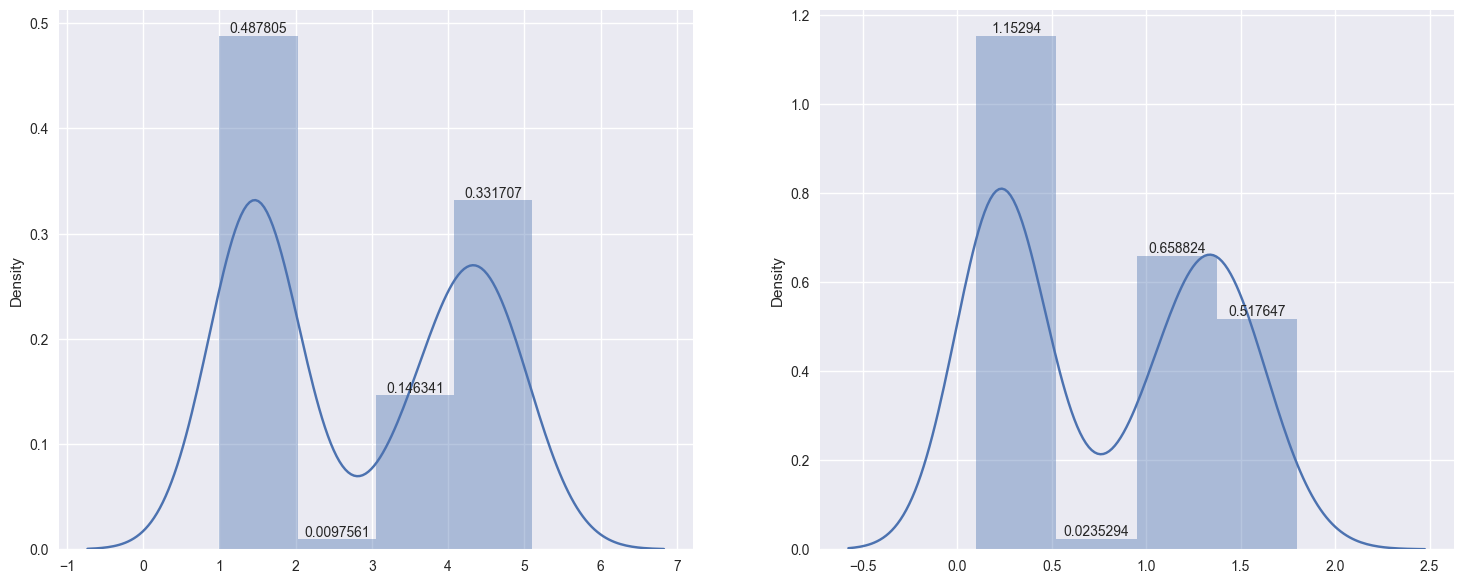

In [183]:
plt.subplots(1,2,figsize = (18,7))
plt.subplot(1,2,1)
ax = sns.distplot(x=binary_df['sepal length (cm)'])
for i in ax.containers:
    ax.bar_label(i)
plt.subplot(1,2,2)
ax = sns.distplot(x=binary_df['sepal width (cm)'])
for i in ax.containers:
    ax.bar_label(i)

plt.subplots(1,2,figsize = (18,7))
plt.subplot(1,2,1)
ax = sns.distplot(x=binary_df['petal length (cm)'])
for i in ax.containers:
    ax.bar_label(i)
plt.subplot(1,2,2)
ax = sns.distplot(x=binary_df['petal width (cm)'])
for i in ax.containers:
    ax.bar_label(i)



In [184]:
binary_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.205926,0.812458,0.789608,0.728290
sepal width (cm),-0.205926,1.000000,-0.602663,-0.570883,-0.690684
petal length (cm),0.812458,-0.602663,1.000000,0.979322,0.969990
petal width (cm),0.789608,-0.570883,0.979322,1.000000,0.960307
target,0.728290,-0.690684,0.969990,0.960307,1.000000


<Axes: >

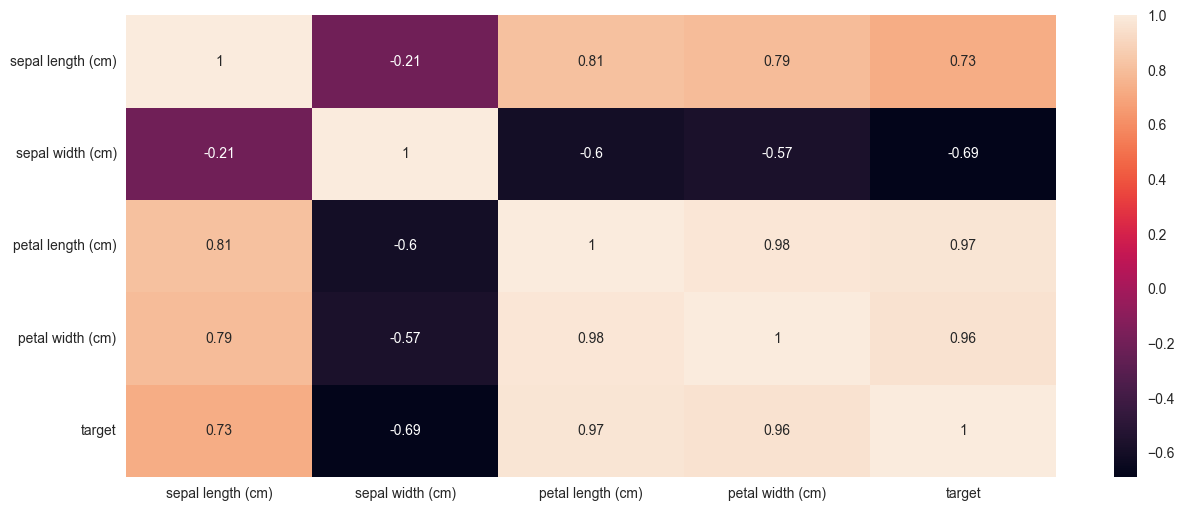

In [185]:
plt.figure(figsize=(15,6))
sns.heatmap(binary_df.corr(),annot=True)

## Complete model training

In [186]:
# Dividing Independent and dependent features
X = binary_df.iloc[:,:-1]
y = binary_df.iloc[:,-1]

In [187]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

In [188]:
# instance of model
classifier = LogisticRegression()
classifier

LogisticRegression()

In [189]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [190]:
# prediction
y_pred_test=classifier.predict(X_test)

In [191]:
y_pred_test

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [192]:
list(y_test)

[1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0]

## Confusion matrix , accuracy score , classification report(Precision , Recall , F-Beta Score)

### Confusion matrix

In [193]:
confusion_matrix(y_pred=y_pred_test,y_true=y_test)

array([[12,  0],
       [ 0,  8]], dtype=int64)

### Accuracy score

In [194]:
# for accuracy
accuracy_score(y_pred_test,y_test)
# Hundred percentage accuracy

1.0

### Classification report

In [195]:
# for accuracy
print(classification_report(y_pred=y_pred_test,y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



### predict_proba
This shows the probability be happen of both classes 

In [196]:
classifier.predict_proba(X_test)

array([[0.00118085, 0.99881915],
       [0.01580857, 0.98419143],
       [0.00303433, 0.99696567],
       [0.96964813, 0.03035187],
       [0.94251523, 0.05748477],
       [0.97160984, 0.02839016],
       [0.99355615, 0.00644385],
       [0.03169836, 0.96830164],
       [0.97459743, 0.02540257],
       [0.97892756, 0.02107244],
       [0.95512297, 0.04487703],
       [0.9607199 , 0.0392801 ],
       [0.00429472, 0.99570528],
       [0.9858324 , 0.0141676 ],
       [0.00924893, 0.99075107],
       [0.98144334, 0.01855666],
       [0.00208036, 0.99791964],
       [0.00125422, 0.99874578],
       [0.97463766, 0.02536234],
       [0.96123726, 0.03876274]])

# Hyperparameter Tuning

## GridSearchCV
This do cross validation with all parameters and give the best parameters for our model

In [197]:
# parameters for param_grid
parameters = {'penalty' : ('l1','l2','elasticnet',None),'C':[1,15,5,4,6,7,10,20],'solver':('ibfgs','liblinear','newton-cholesky','saga','sag')} 

In [198]:
clf = GridSearchCV(estimator=classifier,param_grid=parameters,cv=10 #  StratifiedKFold cross validation will be used
             ,n_jobs=-1)

In [199]:
# this will split train data to train data and validation data
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 15, 5, 4, 6, 7, 10, 20],
                         'penalty': ('l1', 'l2', 'elasticnet', None),
                         'solver': ('ibfgs', 'liblinear', 'newton-cholesky',
                                    'saga', 'sag')})

In [200]:
# this shows me best parameters for my model to train by Cross validation to each parameters
clf.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

### now I will put {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'} parameters in my logistic regression model to get best output

In [201]:
classifier1 = LogisticRegression(C=1,penalty='l2',solver='liblinear')

In [202]:
classifier1.fit(X_train,y_train)

LogisticRegression(C=1, solver='liblinear')

In [203]:
y_pred_test1 = classifier1.predict(X_test)

In [204]:
confusion_matrix(y_pred=y_pred_test1,y_true=y_test)

array([[12,  0],
       [ 0,  8]], dtype=int64)

In [205]:
# for accuracy
accuracy_score(y_pred_test1,y_test)
# Hundred percentage accuracy

1.0

In [206]:
# for accuracy
print(classification_report(y_pred=y_pred_test1,y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [207]:
classifier1.predict_proba(X_test)

array([[0.00194428, 0.99805572],
       [0.01299336, 0.98700664],
       [0.00589798, 0.99410202],
       [0.95004534, 0.04995466],
       [0.95269354, 0.04730646],
       [0.97062626, 0.02937374],
       [0.99067537, 0.00932463],
       [0.0274588 , 0.9725412 ],
       [0.98252664, 0.01747336],
       [0.9792198 , 0.0207802 ],
       [0.97713029, 0.02286971],
       [0.93996866, 0.06003134],
       [0.00802596, 0.99197404],
       [0.99317667, 0.00682333],
       [0.0092318 , 0.9907682 ],
       [0.98119928, 0.01880072],
       [0.00694793, 0.99305207],
       [0.00431935, 0.99568065],
       [0.95844287, 0.04155713],
       [0.96825041, 0.03174959]])

## RandomizedSearchCV
This do cross validation with random parameters and give the best parameters for our model

In [208]:
# parameters for param_distributions
parameters = {'penalty' : ('l1','l2','elasticnet',None),'C':[1,15,5,4,6,7,10,20],'solver':('ibfgs','liblinear','newton-cholesky','saga','sag')} 

In [209]:
random_clf = RandomizedSearchCV(estimator=classifier,param_distributions=parameters,cv=5 # StratifiedKFold cross validation will be used
                                )

In [210]:
random_clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1, 15, 5, 4, 6, 7, 10, 20],
                                        'penalty': ('l1', 'l2', 'elasticnet',
                                                    None),
                                        'solver': ('ibfgs', 'liblinear',
                                                   'newton-cholesky', 'saga',
                                                   'sag')})

In [211]:
random_clf.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 4}

### now I will put {'solver': 'saga', 'penalty': None, 'C': 10} parameters in my logistic regression model to get best output

In [212]:
random_classifier = LogisticRegression(solver='saga',penalty=None,C=10)

In [213]:
random_classifier.fit(X_train,y_train)

LogisticRegression(C=10, penalty=None, solver='saga')

In [214]:
y_pred_test2 = random_classifier.predict(X_test)

In [215]:
y_pred_test2

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [216]:
confusion_matrix(y_true=y_test,y_pred=y_pred_test2)

array([[12,  0],
       [ 0,  8]], dtype=int64)

In [217]:
accuracy_score(y_true=y_test,y_pred=y_pred_test2)

1.0

In [218]:
print(classification_report(y_true=y_test,y_pred=y_pred_test2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

